[Scikit-Learn](http://scikit-learn.org/stable/) is a Python library for Machine Learning.

In [1]:
# lets get some data:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=5)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# numpy everywhere:
print(type(X_train))
print(type(X_test))
print(type(y_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
X_test[:10]

array([[ 5.8,  2.7,  3.9,  1.2],
       [ 6.1,  2.6,  5.6,  1.4],
       [ 5.8,  2.8,  5.1,  2.4],
       [ 4.4,  3.2,  1.3,  0.2],
       [ 7.2,  3.6,  6.1,  2.5],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5.4,  3. ,  4.5,  1.5]])

In [4]:
y_test[:10]

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1])

In [5]:
# build a classifier:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
# store to or load from disk if necessary:
from sklearn.externals import joblib
joblib.dump(classifier, 'data/knn.pkl')
classifier = joblib.load('data/knn.pkl') 

In [7]:
# lets see classification results:
y_predicted = classifier.predict(X_test)
print(type(y_predicted))
y_predicted[:10]

<class 'numpy.ndarray'>


array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [8]:
# evaluate:
import numpy as np
print("accuracy:", np.count_nonzero(y_test == y_predicted) / len(y_test))
print("mse:", np.average((y_test - y_predicted) ** 2))

accuracy: 0.9333333333333333
mse: 0.0666666666667


In [9]:
# which is already done for us:
import sklearn.metrics as metrics
print("accuracy:", metrics.accuracy_score(y_test, y_predicted))
print("mse:", metrics.mean_squared_error(y_test, y_predicted))


accuracy: 0.933333333333
mse: 0.0666666666667


In [10]:
# or even better:
print(metrics.classification_report(y_test, y_predicted, target_names=iris.target_names))
print(metrics.confusion_matrix(y_test, y_predicted))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       1.00      0.82      0.90        11
  virginica       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30

[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [11]:
# now lets do parameter optimization with k-fold:
from  sklearn.grid_search import GridSearchCV
params = dict(n_neighbors=list(range(1, 31)), weights=['uniform', 'distance'])

grid = GridSearchCV(classifier, params, cv = 10, scoring='accuracy')
grid.fit(iris.data, iris.target)

print(len(grid.grid_scores_))
print(grid.grid_scores_[:5])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


60
[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'}, mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'}, mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'}, mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'}]


In [12]:
print(grid.best_score_, grid.best_params_, grid.best_estimator_)

0.98 {'n_neighbors': 13, 'weights': 'uniform'} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [13]:
# or even better:
from sklearn.grid_search import RandomizedSearchCV
params = dict(n_neighbors=list(range(1, 31)), weights=['uniform', 'distance'])
rand = RandomizedSearchCV(classifier, params, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(iris.data, iris.target)
print(len(rand.grid_scores_))
print(rand.best_score_, rand.best_params_, rand.best_estimator_)

10
0.98 {'weights': 'uniform', 'n_neighbors': 18} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


In [14]:
# another example, lets get some data elsewhere:
import pandas as pd
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


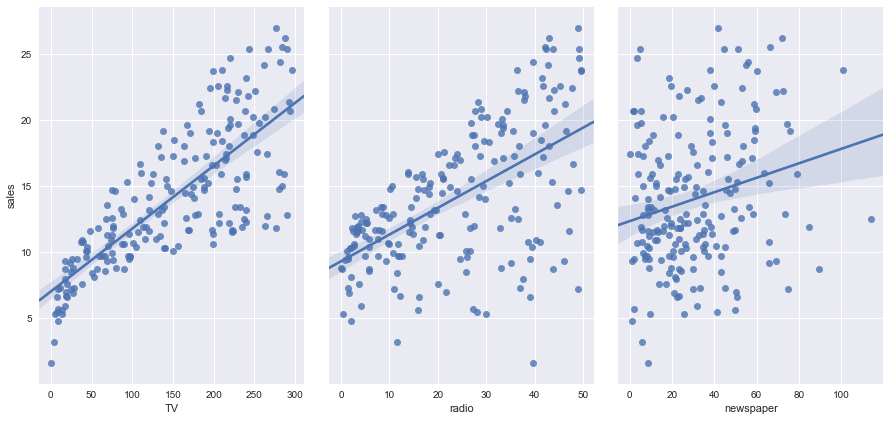

In [15]:
# sneak peek, show the best fit and a 95% confidence band
import seaborn as sns
%matplotlib inline
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=6, aspect=0.7, kind='reg')

In [16]:
# pandas everywhere!
ft = ['TV', 'radio', 'newspaper']
X = df[ft]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
# do linear regression:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# ok, what have we learned? (underscore denotes an estimated attribute)
print(linreg.intercept_) 
list(zip(ft, linreg.coef_))

2.87696662232


[('TV', 0.046564567874150288),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.0034504647111803779)]

In [19]:
np.sum(X_test.iloc[0] * linreg.coef_) + linreg.intercept_

21.709102923364377

In [20]:
# which is:
linreg.predict(X_test)[0]

21.709102923364377